<Axes: xlabel='Month'>

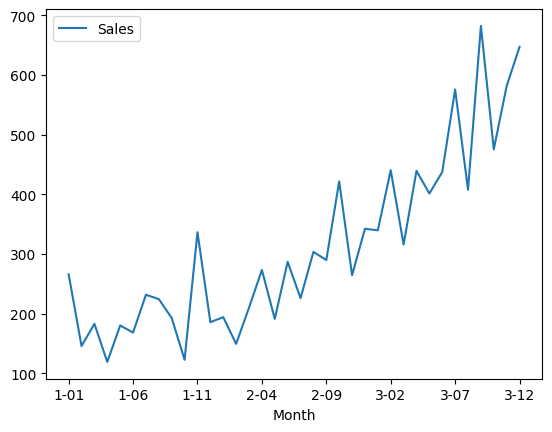

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/shampoo_sales.csv', header=0, parse_dates=True, index_col=0)
df.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

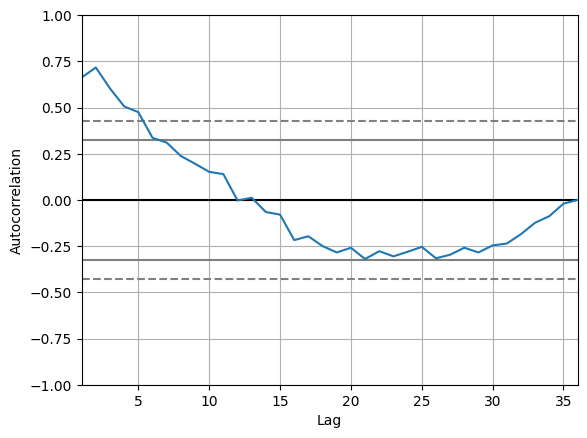

In [2]:
pd.plotting.autocorrelation_plot(df)

In [3]:
model = ARIMA(df, order=(5,1,0)).fit()
#print(model.summary())
print(model.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ar.L1       -0.901378
ar.L2       -0.228392
ar.L3        0.074656
ar.L4        0.251932
ar.L5        0.334396
sigma2    4728.960757
dtype: float64


<Axes: xlabel='Month'>

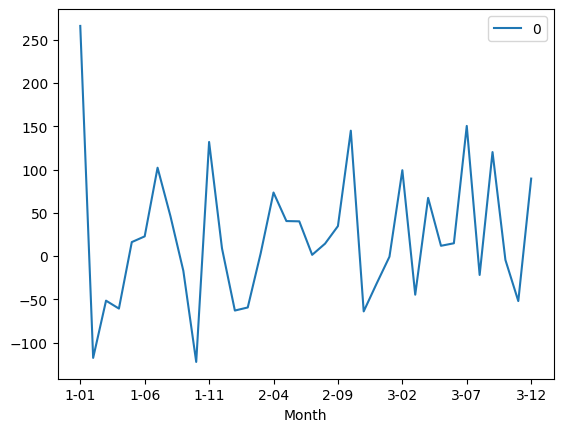

In [4]:
residuals = pd.DataFrame(model.resid)
residuals.plot()

<Axes: ylabel='Density'>

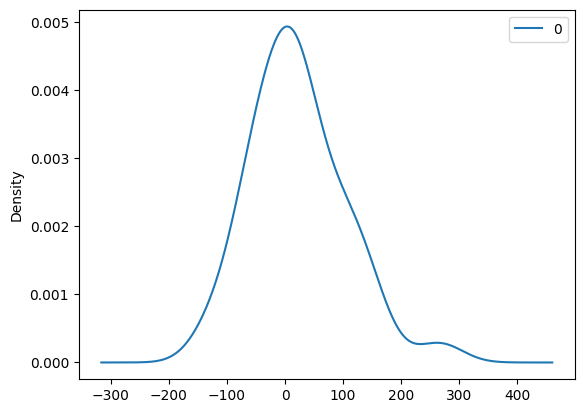

In [5]:
residuals.plot(kind='kde')

In [6]:
print(residuals.describe())

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [7]:
print(model.forecast(steps=5))

36    561.113738
37    671.054470
38    554.031815
39    679.972138
40    601.711133
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
